<a href="https://colab.research.google.com/github/maulik987/maulik/blob/main/22BCE3446.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in the dataset: Index(['account', 'company', 'order', 'sku', 'country', 'year', 'quantity',
       'unitprice', 'transactioncomplete'],
      dtype='object')

Data Types:
 account                 int64
company                object
order                   int64
sku                    object
country                object
year                    int64
quantity                int64
unitprice               int64
transactioncomplete      bool
dtype: object

Numeric columns: Index(['account', 'order', 'year', 'quantity', 'unitprice'], dtype='object')


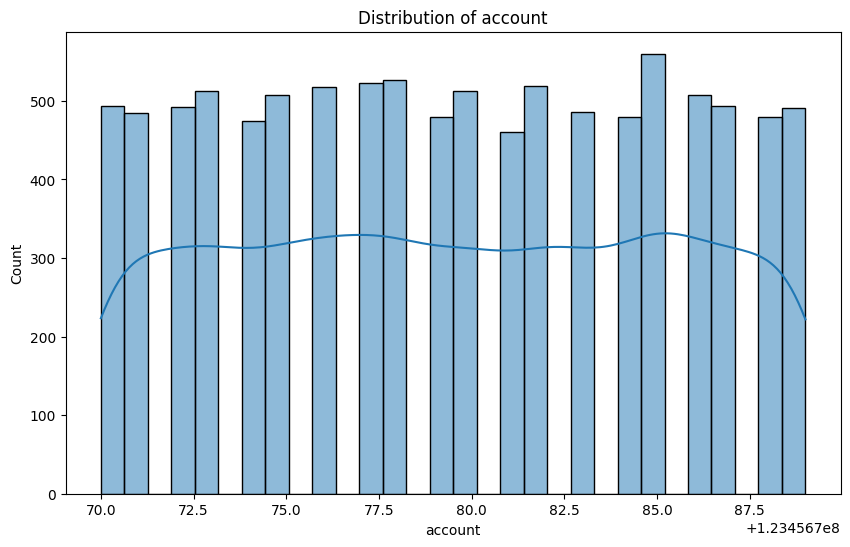

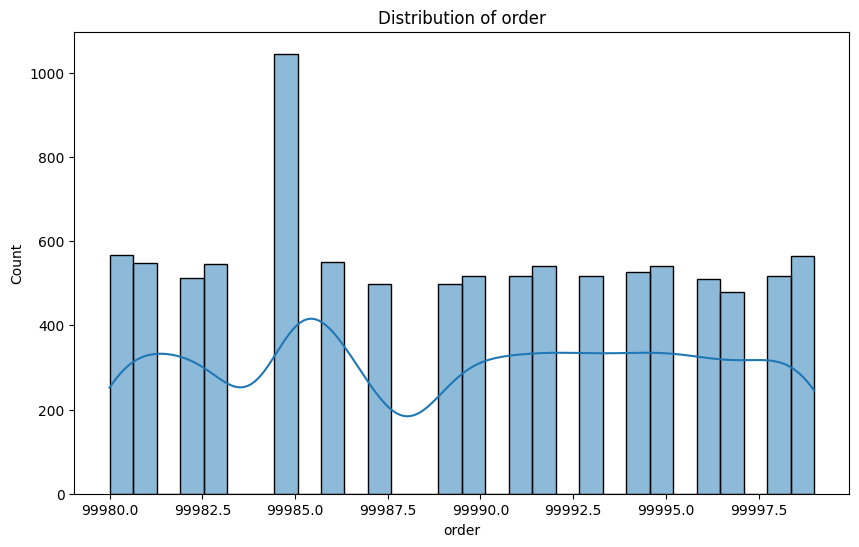

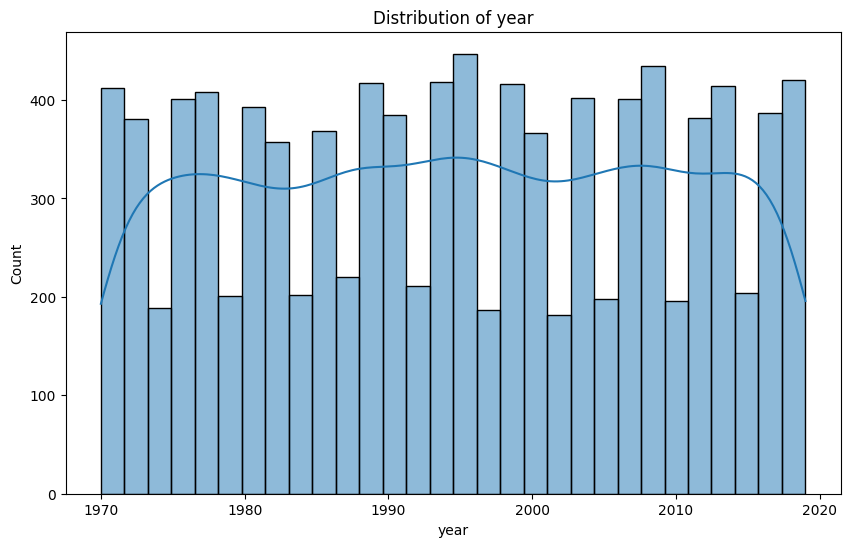

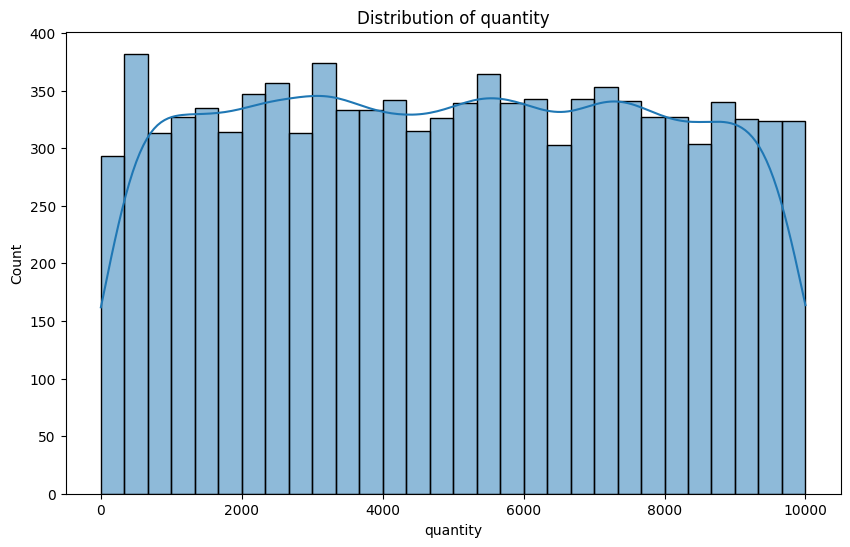

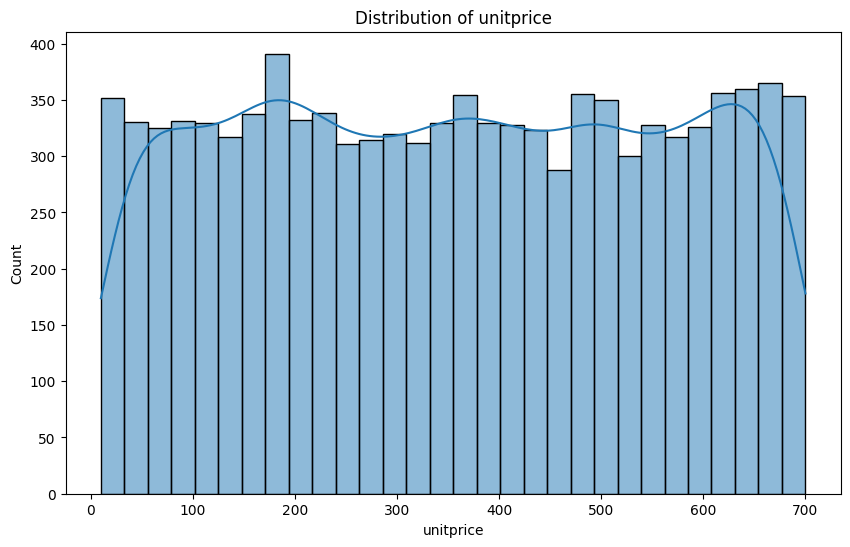

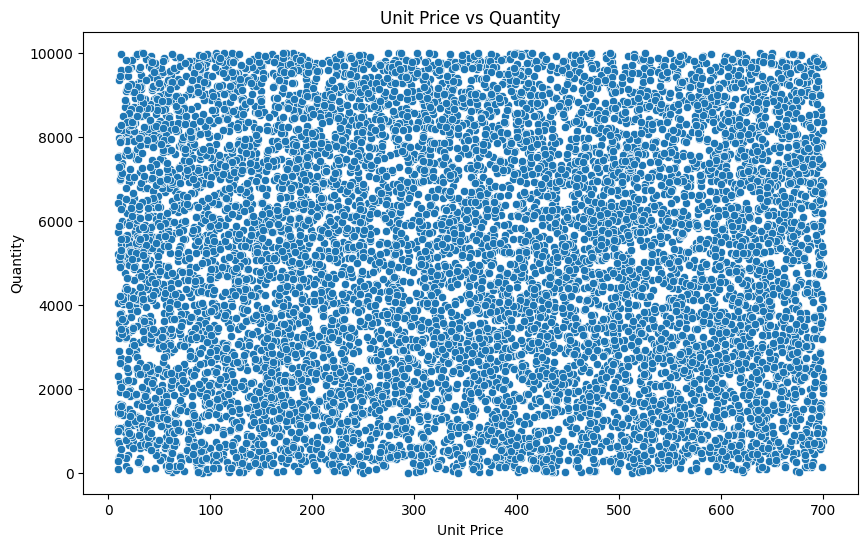

Pearson Correlation between Unit Price and Quantity: -0.00, P-value: 0.88256


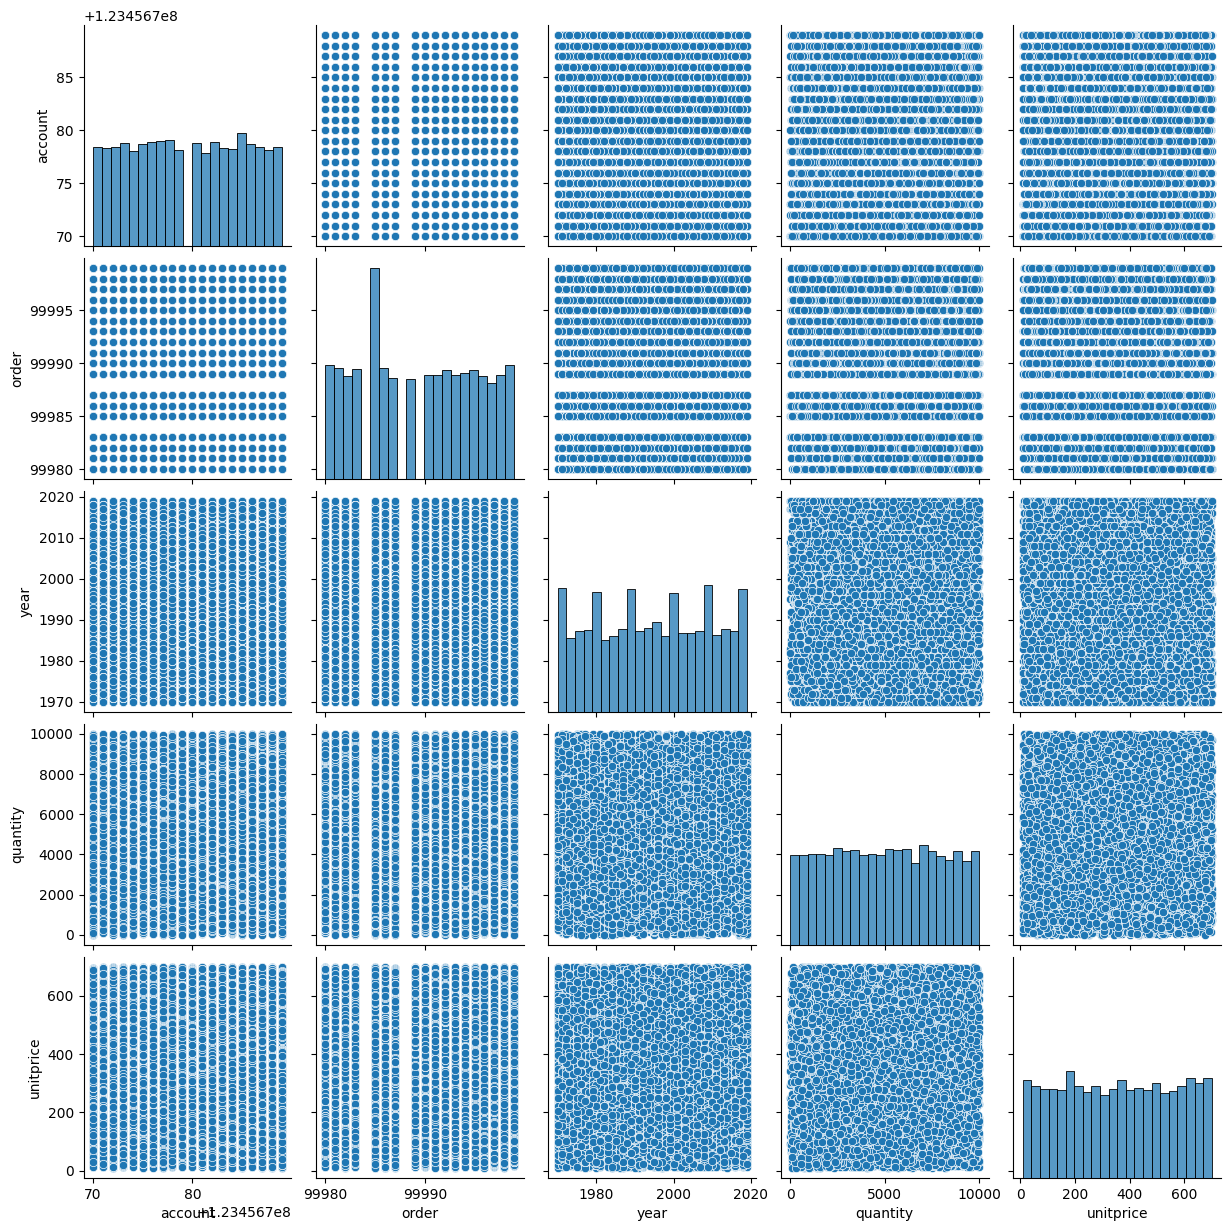

Cleaned dataset saved as 'cleaned_sales_data.csv'.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/sales.csv"
df = pd.read_csv(file_path)

# Clean up column names
df.columns = df.columns.str.strip().str.lower()

# Print the columns and data types to verify
print("Columns in the dataset:", df.columns)
print("\nData Types:\n", df.dtypes)

# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print("\nNumeric columns:", numeric_cols)

# Univariate Analysis
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Bivariate Analysis - Scatter plot
if 'unitprice' in df.columns and 'quantity' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['unitprice'], y=df['quantity'])
    plt.title("Unit Price vs Quantity")
    plt.xlabel("Unit Price")
    plt.ylabel("Quantity")
    plt.show()

# Pearson correlation
    pearson_corr, p_value = stats.pearsonr(df['unitprice'], df['quantity'])
    print(f"Pearson Correlation between Unit Price and Quantity: {pearson_corr:.2f}, P-value: {p_value:.5f}")

# Pairplot for multivariate analysis
sns.pairplot(df[numeric_cols])
plt.show()

# Save cleaned dataset
df.to_csv("cleaned_sales_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_sales_data.csv'.")



   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   

  highway-mpg  price  
0          27  13495  

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


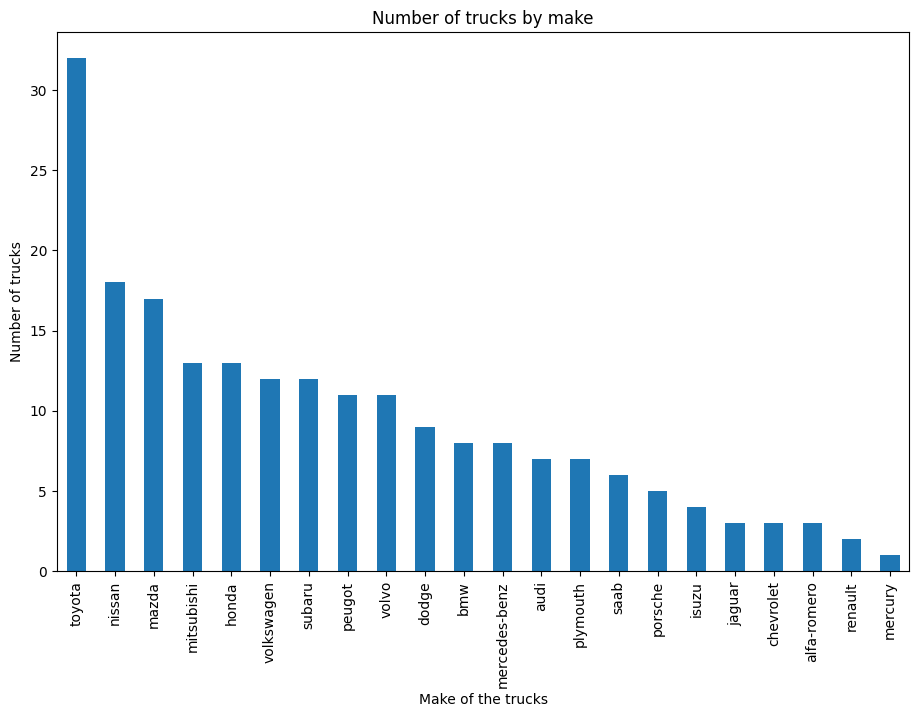

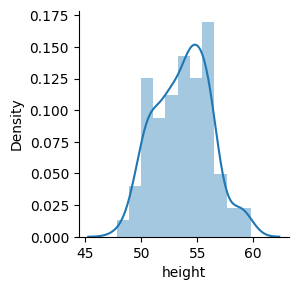

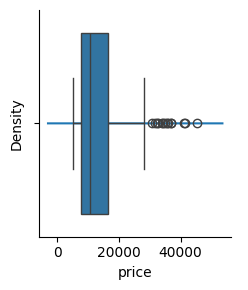

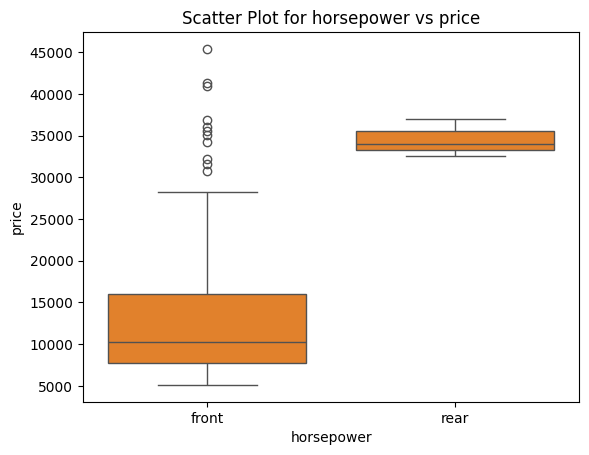

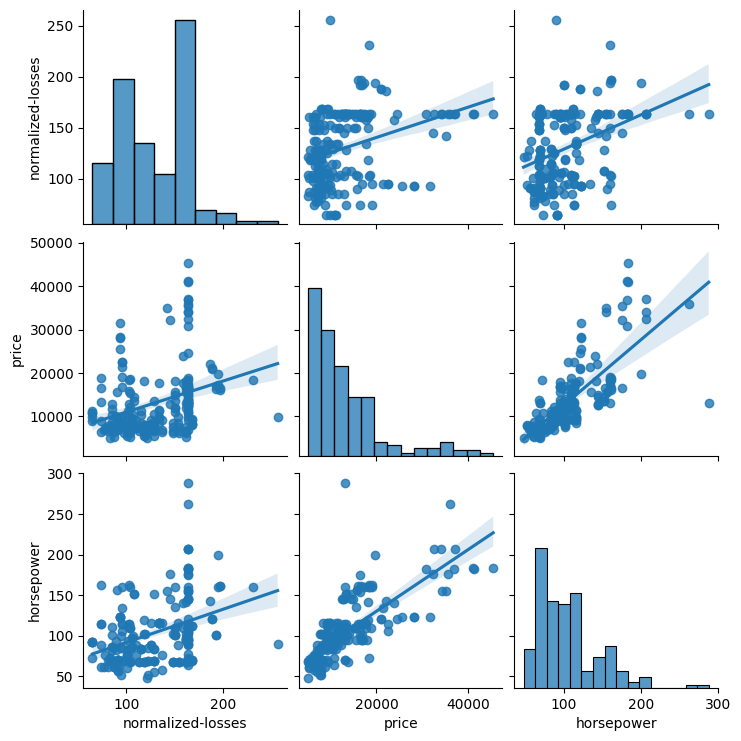

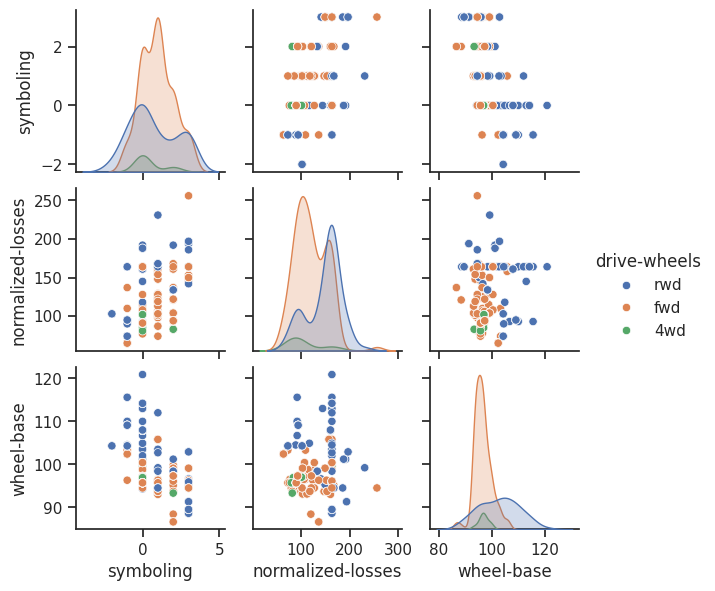

p-value:	 1.591033244659585e-39
cor:		 0.757945621793524


<Axes: >

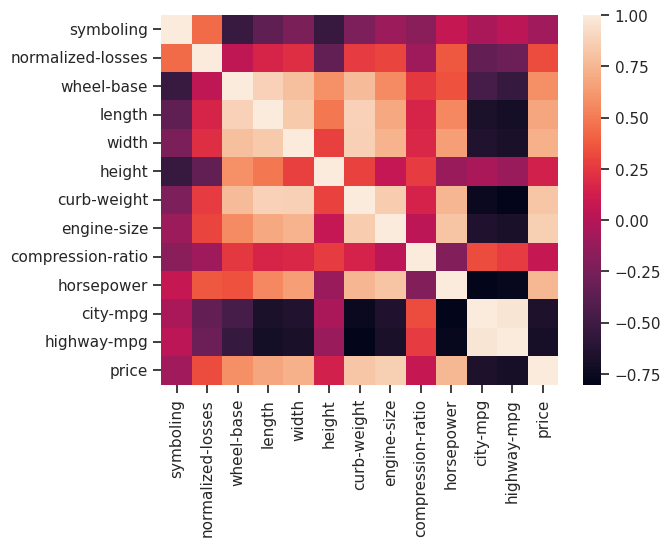

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/data.csv")
print(df.head(3))
print(df.tail(3))

df.dtypes

print(df.describe())
pd.isna(df).any()

df['price'].str.isnumeric().value_counts()

df['price'].str.isnumeric().value_counts()

price = df['price'].loc[df['price'] != '?']
print(price)
pmean = price.astype(int).mean()
print("Mean =",pmean)
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head(10)

horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()


mean = df["height"].mean()
median =df["height"].median()
mode = df["height"].mode()
print(mean , median, mode)

df.make.value_counts().nlargest(40).plot(kind='bar', figsize=(11,7))
plt.title("Number of trucks by make")
plt.ylabel('Number of trucks')
plt.xlabel('Make of the trucks')

sns.FacetGrid(df).map(sns.distplot,"height").add_legend()

sns.FacetGrid(df).map(sns.distplot,"price").add_legend()

sns.boxplot(x="price",data=df)
plt.show()

plt.scatter(df["price"], df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("horsepower")
plt.ylabel("price")

np.corrcoef(df["price"], df["horsepower"])

np.corrcoef(df["horsepower"], df["height"])

sns.boxplot(x="engine-location",y="price",data=df)
plt.show()

sns.pairplot(df,vars = ['normalized-losses', 'price','horsepower'], kind="reg")
plt.show()

sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels")
plt.show()

from scipy import stats

corr = stats.pearsonr(df["price"], df["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

correlation = df.corr(method='pearson', numeric_only=True)
correlation

sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)


